In [ ]:
import pandas as pd
import numpy as np
import joblib
from datetime import datetime, timedelta
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 1: Enhance your data preprocessing to extract temporal features
def preprocess_with_time_features(file_path):
    df = pd.read_csv(file_path)
    
    # Remove duplicates
    df = df.drop_duplicates(subset=['date'], keep='last')
    
    # Handle missing values
    df.replace(to_replace='-', value=np.nan, inplace=True)
    df.snow_depth_cm = df.snow_depth_cm.replace(to_replace='-1', value='0')
    
    # Convert to numeric
    df['avg_temp_c'] = pd.to_numeric(df['avg_temp_c'], errors='coerce')
    df['snow_depth_cm'] = pd.to_numeric(df['snow_depth_cm'], errors='coerce')
    df['uv_index'] = pd.to_numeric(df['uv_index'], errors='coerce')
    
    # Convert date string to datetime object
    df['date'] = pd.to_datetime(df['date'])
    
    # Extract time-based features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_year'] = df['date'].dt.dayofyear
    
    # Drop rows with missing target values
    df = df.dropna(subset=['snow_depth_cm'])
    
    return df


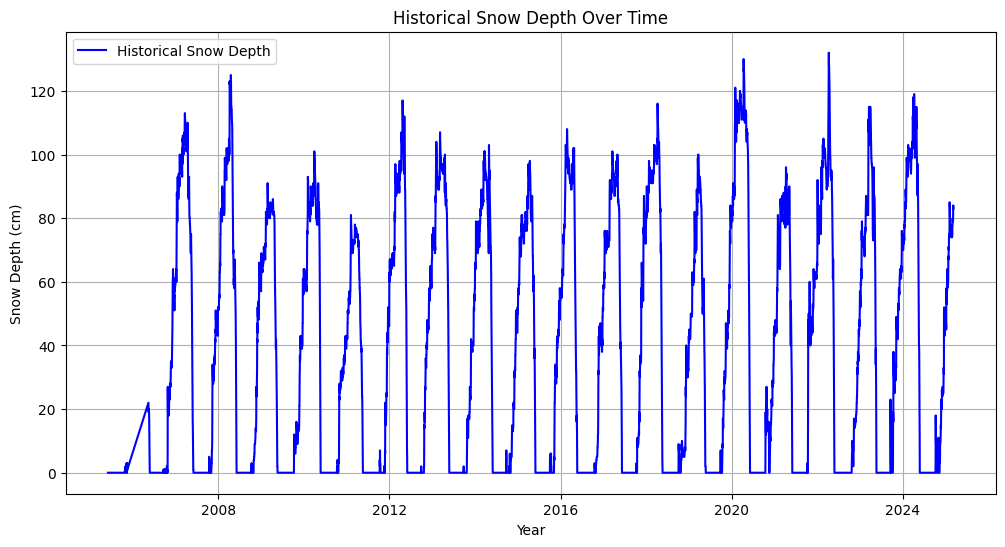

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

historical_data = preprocess_with_time_features('data_by_location/Levi_data.csv')

# Sort by date to ensure proper plotting
historical_data = historical_data.sort_values(by='date')

# Plot historical snow depth
plt.figure(figsize=(12, 6))
plt.plot(historical_data['date'], historical_data['snow_depth_cm'], label='Historical Snow Depth', color='b')

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Snow Depth (cm)')
plt.title('Historical Snow Depth Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Between years 2030 to 2035, can be used with future_testing.py / m_testing.ipynb

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Filter predictions for years 2030-2035
mask = (future_predictions['date'] >= '2030-01-01') & (future_predictions['date'] <= '2035-12-31')
filtered_predictions = future_predictions.loc[mask]

# Plotting the filtered predictions
plt.figure(figsize=(24, 12))
plt.plot(filtered_predictions['date'], filtered_predictions['predicted_snow_depth'], 
         label='Predicted Snow Depth', color='blue', linewidth=2)

# Formatting
plt.xlabel("Date", fontsize=14)
plt.ylabel("Snow Depth (cm)", fontsize=14)
plt.title("Predicted Snow Depth (2030-2035)", fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Ensure y-axis starts at 0
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(24, 12))
plt.plot(future_predictions['date'], future_predictions['predicted_snow_depth'], label='Predicted Snow Depth', color='blue')

# Formatting
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Predicted Snow Depth Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()